Predicted Career: Counselor

Reasoning for the prediction:
 Prediction based on the following features:
O_score: 9
C_score: 9
E_score: 3
A_score: 9
N_score: 7
Numerical Aptitude: 9
Spatial Aptitude: 5
Perceptual Aptitude: 9
Abstract Reasoning: 7
Verbal Reasoning: 9

Top 5 important features for prediction:
Verbal Reasoning: Importance=0.1166
Spatial Aptitude: Importance=0.1132
Perceptual Aptitude: Importance=0.1059
Numerical Aptitude: Importance=0.1048
E_score: Importance=0.1045

Predicted Career: ('Counselor', 'Prediction based on the following features:\nO_score: 9\nC_score: 9\nE_score: 3\nA_score: 9\nN_score: 7\nNumerical Aptitude: 9\nSpatial Aptitude: 5\nPerceptual Aptitude: 9\nAbstract Reasoning: 7\nVerbal Reasoning: 9\n\nTop 5 important features for prediction:\nVerbal Reasoning: Importance=0.1166\nSpatial Aptitude: Importance=0.1132\nPerceptual Aptitude: Importance=0.1059\nNumerical Aptitude: Importance=0.1048\nE_score: Importance=0.1045\n')
Accuracy=  84.84848484848484 %


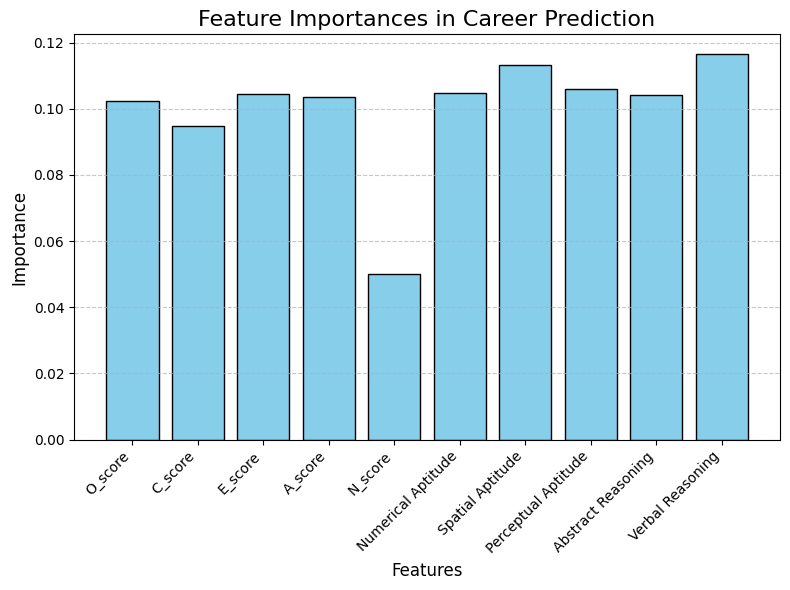

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Load dataset
url = "/Users/sriva/OneDrive/Pictures/Saved Pictures/Data_finall.csv"
df = pd.read_csv(url)

# Handle missing values
df = df.dropna(axis=1, how='all')  # Drop completely empty columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Impute missing values for numerical and categorical columns
df[numerical_cols] = SimpleImputer(strategy='mean').fit_transform(df[numerical_cols])
df[categorical_cols] = SimpleImputer(strategy='most_frequent').fit_transform(df[categorical_cols])

# Encode categorical features
label_encoders = {}
for column in categorical_cols:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Use all 10 features for model training
X = df.drop(columns=['Career'])  # All columns except 'Career' will be used as features
y = df['Career']

# Combine rare classes
min_samples = 5
class_counts = y.value_counts()
rare_classes = class_counts[class_counts < min_samples].index
df['Career'] = df['Career'].apply(lambda x: 'Other' if x in rare_classes else x)

# Rebalance classes
df_balanced = pd.concat([X, y], axis=1)
max_samples = df_balanced['Career'].value_counts().max()

balanced_dfs = [
    resample(df_balanced[df_balanced['Career'] == cls], replace=True, n_samples=max_samples, random_state=42)
    for cls in df_balanced['Career'].unique()
]
df_balanced = pd.concat(balanced_dfs)

X = df_balanced.drop(columns=['Career'])
y = df_balanced['Career']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42, class_weight="balanced"), param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Best classifier
classifier = grid_search.best_estimator_

# Train classifier
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)

# Function to predict a single career based on user input
def predict_single_career(user_input):
    # Convert the user input to a DataFrame with the same feature names
    user_input_df = pd.DataFrame([user_input], columns=X.columns)
    
    # Predict the career using the classifier
    prediction_encoded = classifier.predict(user_input_df)[0]
    
    # Decode the prediction back to the original career label
    predicted_career = label_encoders['Career'].inverse_transform([prediction_encoded])[0]
    
    # Get the feature importances
    importance = classifier.feature_importances_
    important_features = sorted(zip(X.columns, importance), key=lambda x: x[1], reverse=True)[:5]  # Top 5 important features
    
    # Construct the reasoning based on input features and importance
    reasoning = f"Prediction based on the following features:\n"
    for feature, value in zip(X.columns, user_input):
        reasoning += f"{feature}: {value}\n"
    
    reasoning += "\nTop 5 important features for prediction:\n"
    for feature, imp in important_features:
        reasoning += f"{feature}: Importance={imp:.4f}\n"
    
    return predicted_career, reasoning

# Example input (updated to match the 10 features)
example_input = [9, 9, 3, 9, 7, 9, 5, 9, 7, 9]  # Replace with actual values for the 10 features

# Ensure the input length matches the number of features
assert len(example_input) == X.shape[1], f"Expected {X.shape[1]} features, but got {len(example_input)}"

# Predict the career and provide reasoning
predicted_career, reasoning = predict_single_career(example_input)
print(f"Predicted Career: {predicted_career}")
print("\nReasoning for the prediction:\n", reasoning)
#he career for the single input and display the result
predicted_career = predict_single_career(example_input)
print(f"Predicted Career: {predicted_career}")
acc=accuracy_score(y_test,y_pred)
print("Accuracy= ",acc*100,"%")
importances = classifier.feature_importances_
indices = range(len(importances))

plt.figure(figsize=(8, 6))
plt.bar(indices, importances, color='skyblue', edgecolor='black')
plt.xticks(indices, X.columns, rotation=45, ha='right', fontsize=10)
plt.title('Feature Importances in Career Prediction', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


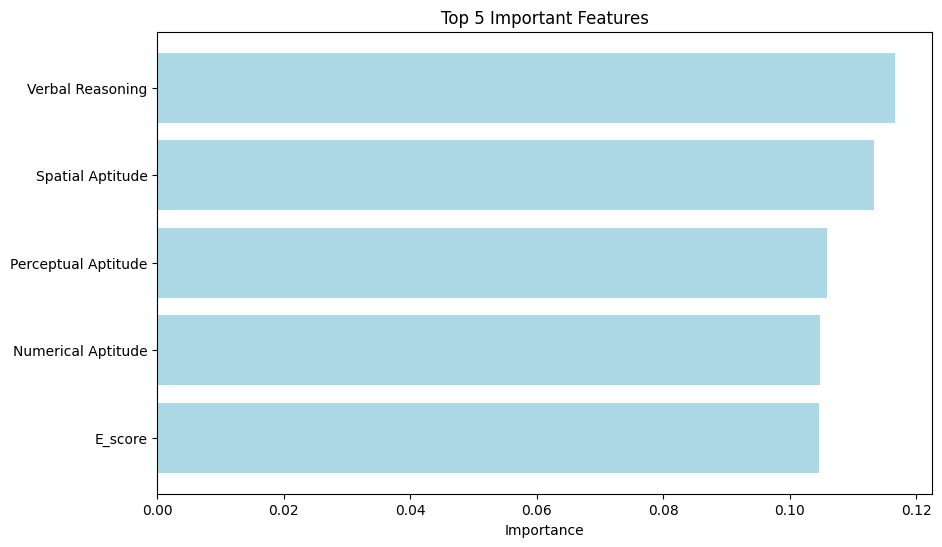

Predicted Career: Analyst

Reasoning for the prediction:
 Prediction based on the following features:
O_score: 8
C_score: 4
E_score: 3
A_score: 5
N_score: 7
Numerical Aptitude: 8
Spatial Aptitude: 5
Perceptual Aptitude: 9
Abstract Reasoning: 7
Verbal Reasoning: 9

Top 5 important features for prediction:
Verbal Reasoning: Importance=0.1166
Spatial Aptitude: Importance=0.1132
Perceptual Aptitude: Importance=0.1059
Numerical Aptitude: Importance=0.1048
E_score: Importance=0.1045

Accuracy=  84.84848484848484 %


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Load dataset
url = "/Users/sriva/OneDrive/Pictures/Saved Pictures/Data_finall.csv"
df = pd.read_csv(url)

# Handle missing values
df = df.dropna(axis=1, how='all')  # Drop completely empty columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Impute missing values for numerical and categorical columns
df[numerical_cols] = SimpleImputer(strategy='mean').fit_transform(df[numerical_cols])
df[categorical_cols] = SimpleImputer(strategy='most_frequent').fit_transform(df[categorical_cols])

# Encode categorical features
label_encoders = {}
for column in categorical_cols:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Use all 10 features for model training
X = df.drop(columns=['Career'])  # All columns except 'Career' will be used as features
y = df['Career']

# Combine rare classes
min_samples = 5
class_counts = y.value_counts()
rare_classes = class_counts[class_counts < min_samples].index
df['Career'] = df['Career'].apply(lambda x: 'Other' if x in rare_classes else x)

# Rebalance classes
df_balanced = pd.concat([X, y], axis=1)
max_samples = df_balanced['Career'].value_counts().max()

balanced_dfs = [
    resample(df_balanced[df_balanced['Career'] == cls], replace=True, n_samples=max_samples, random_state=42)
    for cls in df_balanced['Career'].unique()
]
df_balanced = pd.concat(balanced_dfs)

X = df_balanced.drop(columns=['Career'])
y = df_balanced['Career']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42, class_weight="balanced"), param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Best classifier
classifier = grid_search.best_estimator_

# Train classifier
classifier.fit(X_train, y_train)

# Function to predict a single career based on user input
def predict_single_career(user_input):
    # Convert the user input to a DataFrame with the same feature names
    user_input_df = pd.DataFrame([user_input], columns=X.columns)
    
    # Predict the career using the classifier
    prediction_encoded = classifier.predict(user_input_df)[0]
    
    # Decode the prediction back to the original career label
    predicted_career = label_encoders['Career'].inverse_transform([prediction_encoded])[0]
    
    # Get the feature importances
    importance = classifier.feature_importances_
    important_features = sorted(zip(X.columns, importance), key=lambda x: x[1], reverse=True)[:5]  # Top 5 important features
    
    # Construct the reasoning based on input features and importance
    reasoning = f"Prediction based on the following features:\n"
    for feature, value in zip(X.columns, user_input):
        reasoning += f"{feature}: {value}\n"
    
    reasoning += "\nTop 5 important features for prediction:\n"
    for feature, imp in important_features:
        reasoning += f"{feature}: Importance={imp:.4f}\n"
    
    # Plot feature importances
    features, importance_values = zip(*important_features)
    plt.figure(figsize=(10, 6))
    plt.barh(features, importance_values, color='lightblue')
    plt.xlabel('Importance')
    plt.title('Top 5 Important Features')
    plt.gca().invert_yaxis()  # To show the most important feature at the top
    plt.show()
    
    return predicted_career, reasoning

# Example input (updated to match the 10 features)
example_input = [8, 4, 3, 5, 7, 8, 5, 9, 7, 9]  # Replace with actual values for the 10 features

# Ensure the input length matches the number of features
assert len(example_input) == X.shape[1], f"Expected {X.shape[1]} features, but got {len(example_input)}"

# Predict the career and provide reasoning
predicted_career, reasoning = predict_single_career(example_input)
print(f"Predicted Career: {predicted_career}")
print("\nReasoning for the prediction:\n", reasoning)
acc=accuracy_score(y_test,y_pred)
print("Accuracy= ",acc*100,"%")


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Load dataset
url = "/Users/sriva/OneDrive/Pictures/Saved Pictures/Data_finall.csv"
df = pd.read_csv(url)

# Handle missing values
df = df.dropna(axis=1, how='all')  # Drop completely empty columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Impute missing values for numerical and categorical columns
df[numerical_cols] = SimpleImputer(strategy='mean').fit_transform(df[numerical_cols])
df[categorical_cols] = SimpleImputer(strategy='most_frequent').fit_transform(df[categorical_cols])

# Encode categorical features
label_encoders = {}
for column in categorical_cols:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Use all 10 features for model training
X = df.drop(columns=['Career'])  # All columns except 'Career' will be used as features
y = df['Career']

# Combine rare classes
min_samples = 5
class_counts = y.value_counts()
rare_classes = class_counts[class_counts < min_samples].index
df['Career'] = df['Career'].apply(lambda x: 'Other' if x in rare_classes else x)

# Rebalance classes
df_balanced = pd.concat([X, y], axis=1)
max_samples = df_balanced['Career'].value_counts().max()

balanced_dfs = [
    resample(df_balanced[df_balanced['Career'] == cls], replace=True, n_samples=max_samples, random_state=42)
    for cls in df_balanced['Career'].unique()
]
df_balanced = pd.concat(balanced_dfs)

X = df_balanced.drop(columns=['Career'])
y = df_balanced['Career']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42, class_weight="balanced"), param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Best classifier
classifier = grid_search.best_estimator_

# Train classifier
classifier.fit(X_train, y_train)

# Function to predict a single career based on user input
def predict_single_career(user_input):
    # Convert the user input to a DataFrame with the same feature names
    user_input_df = pd.DataFrame([user_input], columns=X.columns)
    
    # Predict the career using the classifier
    prediction_encoded = classifier.predict(user_input_df)[0]
    
    # Decode the prediction back to the original career label
    predicted_career = label_encoders['Career'].inverse_transform([prediction_encoded])[0]
    
    return predicted_career

# Example input (updated to match the 10 features)
example_input = [9, 9, 6, 9, 9, 5, 9, 7, 9, 9]  # Replace with actual values for the 10 features

# Ensure the input length matches the number of features
assert len(example_input) == X.shape[1], f"Expected {X.shape[1]} features, but got {len(example_input)}"

# Predict timport pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Load dataset
url = "/Users/sriva/OneDrive/Pictures/Saved Pictures/Data_finall.csv"
df = pd.read_csv(url)

# Handle missing values
df = df.dropna(axis=1, how='all')  # Drop completely empty columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Impute missing values for numerical and categorical columns
df[numerical_cols] = SimpleImputer(strategy='mean').fit_transform(df[numerical_cols])
df[categorical_cols] = SimpleImputer(strategy='most_frequent').fit_transform(df[categorical_cols])

# Encode categorical features
label_encoders = {}
for column in categorical_cols:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Use all 10 features for model training
X = df.drop(columns=['Career'])  # All columns except 'Career' will be used as features
y = df['Career']

# Combine rare classes
min_samples = 5
class_counts = y.value_counts()
rare_classes = class_counts[class_counts < min_samples].index
df['Career'] = df['Career'].apply(lambda x: 'Other' if x in rare_classes else x)

# Rebalance classes
df_balanced = pd.concat([X, y], axis=1)
max_samples = df_balanced['Career'].value_counts().max()

balanced_dfs = [
    resample(df_balanced[df_balanced['Career'] == cls], replace=True, n_samples=max_samples, random_state=42)
    for cls in df_balanced['Career'].unique()
]
df_balanced = pd.concat(balanced_dfs)

X = df_balanced.drop(columns=['Career'])
y = df_balanced['Career']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42, class_weight="balanced"), param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Best classifier
classifier = grid_search.best_estimator_

# Train classifier
classifier.fit(X_train, y_train)

# Function to predict a single career based on user input
def predict_single_career(user_input):
    # Convert the user input to a DataFrame with the same feature names
    user_input_df = pd.DataFrame([user_input], columns=X.columns)
    
    # Predict the career using the classifier
    prediction_encoded = classifier.predict(user_input_df)[0]
    
    # Decode the prediction back to the original career label
    predicted_career = label_encoders['Career'].inverse_transform([prediction_encoded])[0]
    
    # Get the feature importances
    importance = classifier.feature_importances_
    important_features = sorted(zip(X.columns, importance), key=lambda x: x[1], reverse=True)[:5]  # Top 5 important features
    
    # Construct the reasoning based on input features and importance
    reasoning = f"Prediction based on the following features:\n"
    for feature, value in zip(X.columns, user_input):
        reasoning += f"{feature}: {value}\n"
    
    reasoning += "\nTop 5 important features for prediction:\n"
    for feature, imp in important_features:
        reasoning += f"{feature}: Importance={imp:.4f}\n"
    
    return predicted_career, reasoning

# Example input (updated to match the 10 features)
example_input = [9, 9, 3, 9, 7, 9, 5, 9, 7, 9]  # Replace with actual values for the 10 features

# Ensure the input length matches the number of features
assert len(example_input) == X.shape[1], f"Expected {X.shape[1]} features, but got {len(example_input)}"

# Predict the career and provide reasoning
predicted_career, reasoning = predict_single_career(example_input)
print(f"Predicted Career: {predicted_career}")
print("\nReasoning for the prediction:\n", reasoning)
#he career for the single input and display the result
predicted_career = predict_single_career(example_input)
print(f"Predicted Career: {predicted_career}")
acc=accuracy_score(y_test,y_pred)
print("Accuracy= ",acc*100,"%")

Predicted Career: Counselor

Reasoning for the prediction:
 Prediction based on the following features:
O_score: 9
C_score: 9
E_score: 3
A_score: 9
N_score: 7
Numerical Aptitude: 9
Spatial Aptitude: 5
Perceptual Aptitude: 9
Abstract Reasoning: 7
Verbal Reasoning: 9

Top 5 important features for prediction:
Verbal Reasoning: Importance=0.1166
Spatial Aptitude: Importance=0.1132
Perceptual Aptitude: Importance=0.1059
Numerical Aptitude: Importance=0.1048
E_score: Importance=0.1045

Predicted Career: ('Counselor', 'Prediction based on the following features:\nO_score: 9\nC_score: 9\nE_score: 3\nA_score: 9\nN_score: 7\nNumerical Aptitude: 9\nSpatial Aptitude: 5\nPerceptual Aptitude: 9\nAbstract Reasoning: 7\nVerbal Reasoning: 9\n\nTop 5 important features for prediction:\nVerbal Reasoning: Importance=0.1166\nSpatial Aptitude: Importance=0.1132\nPerceptual Aptitude: Importance=0.1059\nNumerical Aptitude: Importance=0.1048\nE_score: Importance=0.1045\n')
Accuracy=  84.84848484848484 %
